### **1. Setup**

Let's begin by importing the necessary libraries and setting a consistent style for our plots.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

# Set plot style and figure size
sns.set_style('whitegrid')
plt.rc('figure', figsize=(12, 8))

### 2. Credits Dataset Preparation

In [5]:
credits_df = pd.read_csv("../Data/credits.csv")
credits_df.drop_duplicates(inplace=True)
print(f"Dataset Shape: {credits_df.shape}")
credits_df.info()

Dataset Shape: (45439, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 45439 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


This function safely evaluates the string-formatted lists of dictionaries and extracts the names into a comma-separated string.

In [6]:
def extract_names(text):
    if pd.isna(text):
        return np.nan
    try:
        # Evaluate the string into a Python list
        data = literal_eval(text)
        # Handle cases where data might not be a list of dicts
        if isinstance(data, list):
            return ', '.join([item['name'] for item in data if 'name' in item])
    except (ValueError, SyntaxError):
        return np.nan

In [7]:
def extract_info(text, key='name'):
    """
    Safely evaluates a string containing a list of dictionaries and extracts
    a comma-separated string for a given key.
    """
    try:
        data_list = literal_eval(text)
        if isinstance(data_list, list):
            # Use str() to handle non-string values like numbers (e.g., gender, order)
            return ', '.join([str(item.get(key, '')) for item in data_list])
    except (ValueError, SyntaxError):
        # Return an empty string or NaN if parsing fails
        return ''
    return ''

In [8]:
# --- Crew Data Extraction ---
credits_df['name_crew'] = credits_df['crew'].apply(extract_info, key='name')
credits_df['department_crew'] = credits_df['crew'].apply(extract_info, key='department')
credits_df['gender_crew'] = credits_df['crew'].apply(extract_info, key='gender')
credits_df['job_crew'] = credits_df['crew'].apply(extract_info, key='job')
credits_df['id_crew'] = credits_df['crew'].apply(extract_info, key='id')

# --- Cast Data Extraction ---
credits_df['name_cast'] = credits_df['cast'].apply(extract_info, key='name')
credits_df['order_cast'] = credits_df['cast'].apply(extract_info, key='order')
credits_df['gender_cast'] = credits_df['cast'].apply(extract_info, key='gender')
credits_df['id_cast'] = credits_df['cast'].apply(extract_info, key='id')
credits_df['character_cast'] = credits_df['cast'].apply(extract_info, key='character')

# --- Final DataFrame Creation ---
columns_to_keep = [
    'id', 'name_crew', 'department_crew', 'gender_crew', 'job_crew', 'id_crew',
    'name_cast', 'order_cast', 'gender_cast', 'id_cast', 'character_cast'
]

final_credits = credits_df[columns_to_keep]
final_credits.to_csv('../Data/NewCredits.csv', index=False)

print("Successfully created detailed NewCredits.csv file.")
final_credits.head()

Successfully created detailed NewCredits.csv file.


,id,name_crew,department_crew,gender_crew,job_crew,id_crew,name_cast,order_cast,gender_cast,id_cast,character_cast
0,862,"John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Directing, Writing, Writing, Writing, Writing,...","2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2...","Director, Screenplay, Screenplay, Screenplay, ...","7879, 12891, 7, 12892, 12893, 12894, 12895, 12...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12","2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2","31, 12898, 7167, 12899, 12900, 7907, 8873, 111...","Woody (voice), Buzz Lightyear (voice), Mr. Pot..."
1,8844,"Larry J. Franco, Jonathan Hensleigh, James Hor...","Production, Writing, Sound, Directing, Editing...","2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2","Executive Producer, Screenplay, Original Music...","511, 876, 1729, 4945, 4951, 4952, 8023, 9967, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0...","2157, 8537, 205, 145151, 5149, 10739, 58563, 1...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ..."
2,15602,"Howard Deutch, Mark Steven Johnson, Mark Steve...","Directing, Writing, Writing, Crew","2, 2, 2, 2","Director, Characters, Writer, Sound Recordist","26502, 16837, 16837, 1551320","Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","0, 1, 2, 3, 4, 5, 6","2, 2, 1, 1, 1, 2, 2","6837, 3151, 13567, 16757, 589, 16523, 7166","Max Goldman, John Gustafson, Ariel Gustafson, ..."
3,31357,"Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","Directing, Writing, Production, Production, Pr...","2, 0, 0, 2, 1, 0, 0, 0, 2, 0","Director, Screenplay, Producer, Producer, Prod...","2178, 5144, 5144, 21968, 70592, 111118, 111118...","Whitney Houston, Angela Bassett, Loretta Devin...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9","1, 1, 1, 1, 2, 2, 2, 2, 2, 2","8851, 9780, 18284, 51359, 66804, 352, 87118, 3...","Savannah 'Vannah' Jackson, Bernadine 'Bernie' ..."
4,11862,"Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","Sound, Camera, Writing, Production, Writing, D...","2, 2, 1, 1, 2, 2, 2","Original Music Composer, Director of Photograp...","37, 5506, 17698, 17698, 26160, 56106, 68755","Steve Martin, Diane Keaton, Martin Short, Kimb...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11","2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1","67773, 3092, 519, 70696, 59222, 18793, 14592, ...","George Banks, Nina Banks, Franck Eggelhoffer, ..."


### 3. Keywords Dataset Preparation

In [9]:
keywords_df = pd.read_csv("../Data/keywords.csv")
keywords_df.drop_duplicates(inplace=True)

keywords_df['name_keywords'] = keywords_df['keywords'].apply(extract_names)
keywords_df['id_keywords'] = keywords_df['keywords'].apply(extract_names)

# Create the final cleaned DataFrame
final_keywords = keywords_df.drop(["keywords"], axis=1)
final_keywords.to_csv('../Data/NewKeywords.csv', index=False)

print(f"Dataset Shape: {final_keywords.shape}")
final_keywords.head()

Dataset Shape: (45432, 3)


,id,name_keywords,id_keywords
0,862,"jealousy, toy, boy, friendship, friends, rival...","jealousy, toy, boy, friendship, friends, rival..."
1,8844,"board game, disappearance, based on children's...","board game, disappearance, based on children's..."
2,15602,"fishing, best friend, duringcreditsstinger, ol...","fishing, best friend, duringcreditsstinger, ol..."
3,31357,"based on novel, interracial relationship, sing...","based on novel, interracial relationship, sing..."
4,11862,"baby, midlife crisis, confidence, aging, daugh...","baby, midlife crisis, confidence, aging, daugh..."


### 4. Movies Metadata Preparation
This is the main dataset. We'll perform more extensive cleaning, type conversion, and visualization

In [10]:
movies = pd.read_csv("../data/movies_metadata.csv", low_memory=False)

In [11]:
def is_float(string):
    try:
        float(string)
        return True
    except (ValueError, TypeError):
        return False

indices_to_drop = []
for i in movies.index:
    if is_float(movies.loc[i, 'production_countries']) or is_float(movies.loc[i, 'production_companies']):
        indices_to_drop.append(i)

movies.drop(index=indices_to_drop, inplace=True)
movies.dropna(subset=['production_companies', 'production_countries'], inplace=True)
movies.drop_duplicates(inplace=True)

In [12]:
movies = movies.fillna("NANE")

C:\Users\A.R.I\AppData\Local\Temp\ipykernel_16212\1471728635.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  movies = movies.fillna("NANE")


In [13]:
def get_new_text(text, obj='name'):
    if text == 'NANE':
        return np.nan
    try:
        text = literal_eval(str(text))
        if isinstance(text, dict) and obj in text:
            return text[obj]
    except (ValueError, SyntaxError):
        return np.nan
    return np.nan

def get_text(text, obj='name'):
    if text == 'NANE':
        return np.nan
    try:
        text = literal_eval(str(text))
        if isinstance(text, list):
            # Convert all items to strings before joining
            names = [str(i[obj]) for i in text if isinstance(i, dict) and obj in i]
            return ', '.join(names)
    except (ValueError, SyntaxError):
        return np.nan
    return np.nan

movies['name_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text, obj="name")
movies['id_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text, obj="id")
movies['poster_path_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text, obj="poster_path")
movies['backdrop_path_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text, obj="backdrop_path")

In [14]:
movies['name_genres'] = movies['genres'].apply(get_text, obj="name")
movies['id_genres'] = movies['genres'].apply(get_text, obj="id")

In [15]:
movies['name_production_countries'] = movies['production_countries'].apply(get_text, obj="name")
movies['iso_3166_1_production_companies'] = movies['production_countries'].apply(get_text, obj="iso_3166_1")

In [16]:
movies['name_production_companies'] = movies['production_companies'].apply(get_text, obj="name")
movies['id_production_companies'] = movies['production_companies'].apply(get_text, obj="id")

In [17]:
newMovies = movies.drop(["spoken_languages", "genres", "production_countries", "belongs_to_collection"], axis=1)
newMovies.to_csv('../Data/NewMoviesMetadata.csv', index=False)

### 5. Data Loading and Cleaning
Now we'll load the dataset and inspect it for missing values.

In [18]:
df = pd.read_csv("../Data/NewCredits.csv")

print("Missing values before cleaning:")
print(df.isnull().sum())

initial_rows = len(df)
df.dropna(inplace=True)
cleaned_rows = len(df)

print(f"\nInitial rows: {initial_rows}")
print(f"Rows after dropping NaNs: {cleaned_rows}")
print(f"Rows removed: {initial_rows - cleaned_rows}")

df.head()

Missing values before cleaning:
id                    0
name_crew           771
department_crew     771
gender_crew         771
job_crew            771
id_crew             771
name_cast          2414
order_cast         2414
gender_cast        2414
id_cast            2414
character_cast     2566
dtype: int64

Initial rows: 45439
Rows after dropping NaNs: 42534
Rows removed: 2905


,id,name_crew,department_crew,gender_crew,job_crew,id_crew,name_cast,order_cast,gender_cast,id_cast,character_cast
0,862,"John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Directing, Writing, Writing, Writing, Writing,...","2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2...","Director, Screenplay, Screenplay, Screenplay, ...","7879, 12891, 7, 12892, 12893, 12894, 12895, 12...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12","2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2","31, 12898, 7167, 12899, 12900, 7907, 8873, 111...","Woody (voice), Buzz Lightyear (voice), Mr. Pot..."
1,8844,"Larry J. Franco, Jonathan Hensleigh, James Hor...","Production, Writing, Sound, Directing, Editing...","2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2","Executive Producer, Screenplay, Original Music...","511, 876, 1729, 4945, 4951, 4952, 8023, 9967, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0...","2157, 8537, 205, 145151, 5149, 10739, 58563, 1...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ..."
2,15602,"Howard Deutch, Mark Steven Johnson, Mark Steve...","Directing, Writing, Writing, Crew","2, 2, 2, 2","Director, Characters, Writer, Sound Recordist","26502, 16837, 16837, 1551320","Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","0, 1, 2, 3, 4, 5, 6","2, 2, 1, 1, 1, 2, 2","6837, 3151, 13567, 16757, 589, 16523, 7166","Max Goldman, John Gustafson, Ariel Gustafson, ..."
3,31357,"Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","Directing, Writing, Production, Production, Pr...","2, 0, 0, 2, 1, 0, 0, 0, 2, 0","Director, Screenplay, Producer, Producer, Prod...","2178, 5144, 5144, 21968, 70592, 111118, 111118...","Whitney Houston, Angela Bassett, Loretta Devin...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9","1, 1, 1, 1, 2, 2, 2, 2, 2, 2","8851, 9780, 18284, 51359, 66804, 352, 87118, 3...","Savannah 'Vannah' Jackson, Bernadine 'Bernie' ..."
4,11862,"Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","Sound, Camera, Writing, Production, Writing, D...","2, 2, 1, 1, 2, 2, 2","Original Music Composer, Director of Photograp...","37, 5506, 17698, 17698, 26160, 56106, 68755","Steve Martin, Diane Keaton, Martin Short, Kimb...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11","2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1","67773, 3092, 519, 70696, 59222, 18793, 14592, ...","George Banks, Nina Banks, Franck Eggelhoffer, ..."


In [19]:
def plot_top_n(dataframe, column, n=20, title=None, xlabel=None, color_palette='viridis'):
    """
    Cleans a comma-separated column, counts item frequencies, and plots the top N.
    """
    if title is None:
        title = f'Top {n} Most Frequent {column.replace("_", " ").title()}'
    if xlabel is None:
        xlabel = 'Count'

    counts = (
        dataframe[column]
        .str.split(',')
        .explode()
        .str.strip()
        .value_counts()
    )

    counts = counts.drop(labels=[''], errors='ignore')

    top_counts = counts.head(n)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_counts.values, y=top_counts.index, palette=color_palette)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('')
    plt.show()

### 6. Crew Data Analysis

C:\Users\A.R.I\AppData\Local\Temp\ipykernel_16212\1192687956.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts.values, y=top_counts.index, palette=color_palette)


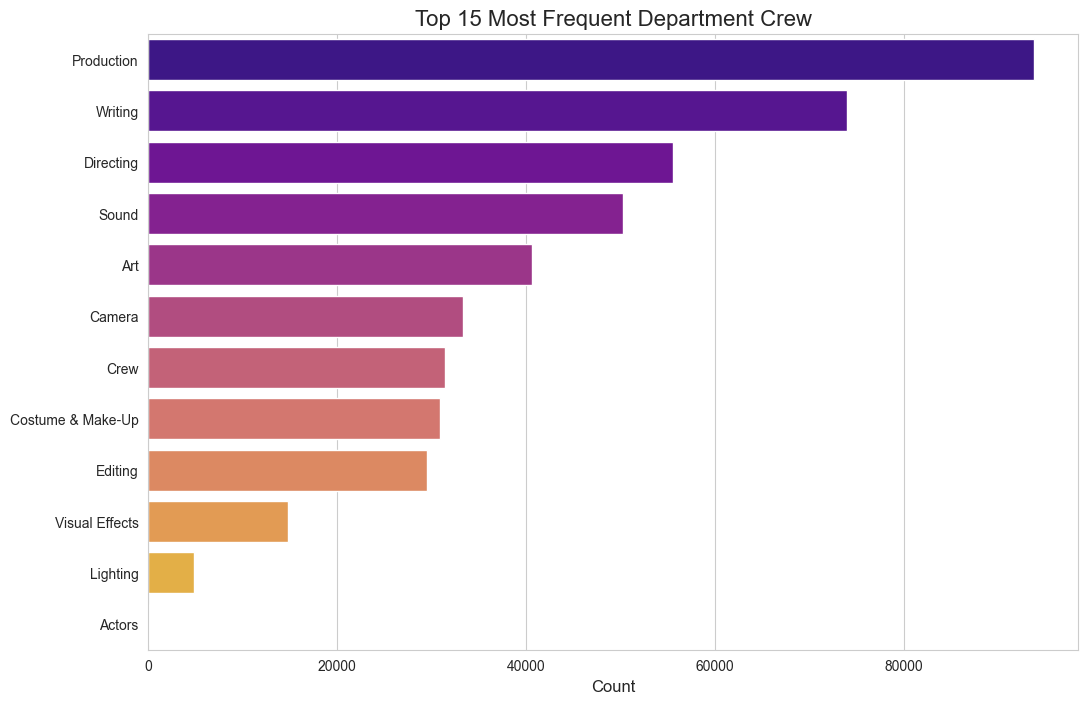

C:\Users\A.R.I\AppData\Local\Temp\ipykernel_16212\1192687956.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts.values, y=top_counts.index, palette=color_palette)


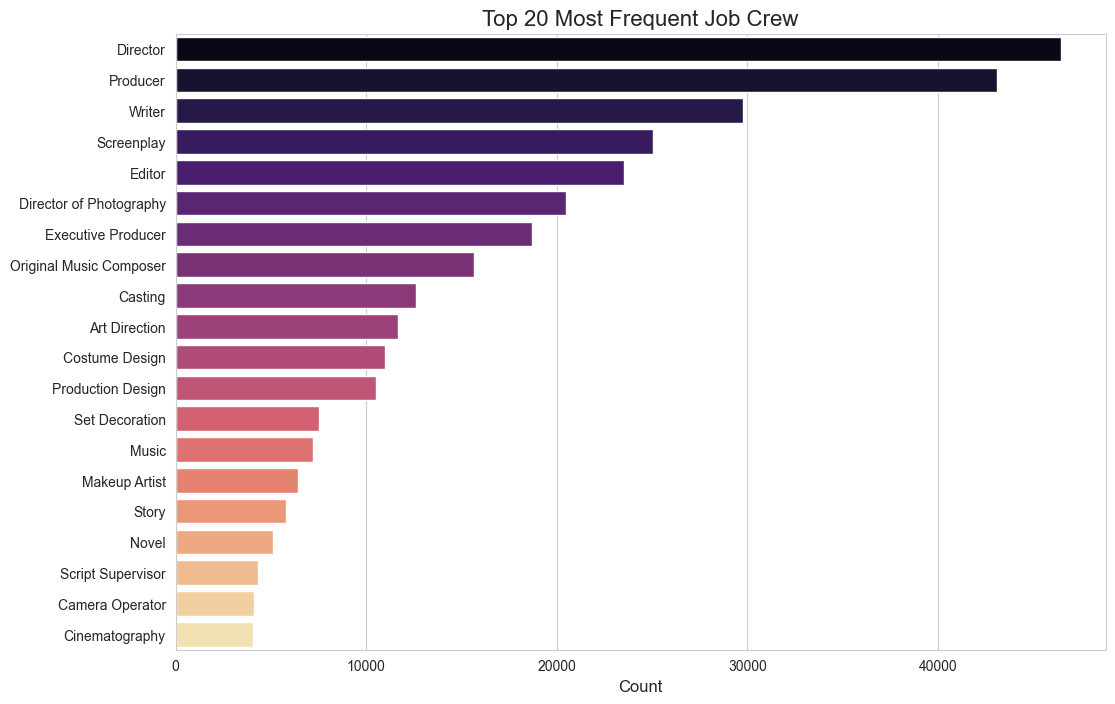

In [20]:
plot_top_n(df, 'department_crew', n=15, color_palette='plasma')
plot_top_n(df, 'job_crew', n=20, color_palette='magma')

C:\Users\A.R.I\AppData\Local\Temp\ipykernel_16212\1192687956.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts.values, y=top_counts.index, palette=color_palette)


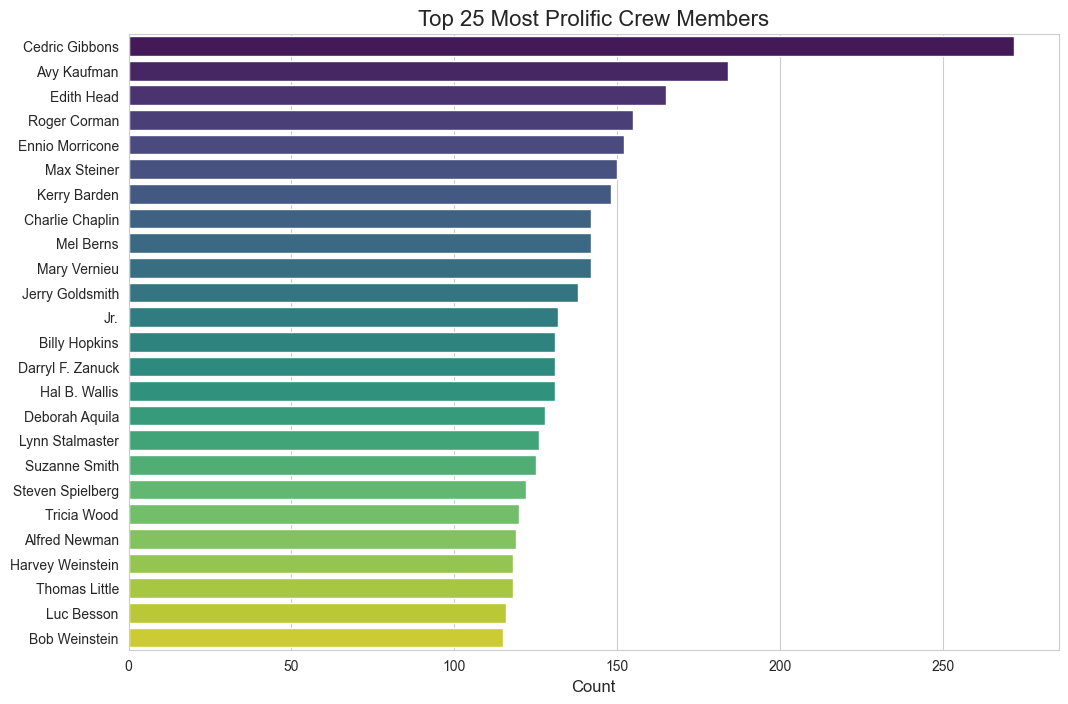

In [21]:
plot_top_n(df, 'name_crew', n=25, title='Top 25 Most Prolific Crew Members')

### 7. Cast Data Analysis
Next, we'll apply the same analysis to the cast members.

C:\Users\A.R.I\AppData\Local\Temp\ipykernel_16212\1192687956.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts.values, y=top_counts.index, palette=color_palette)


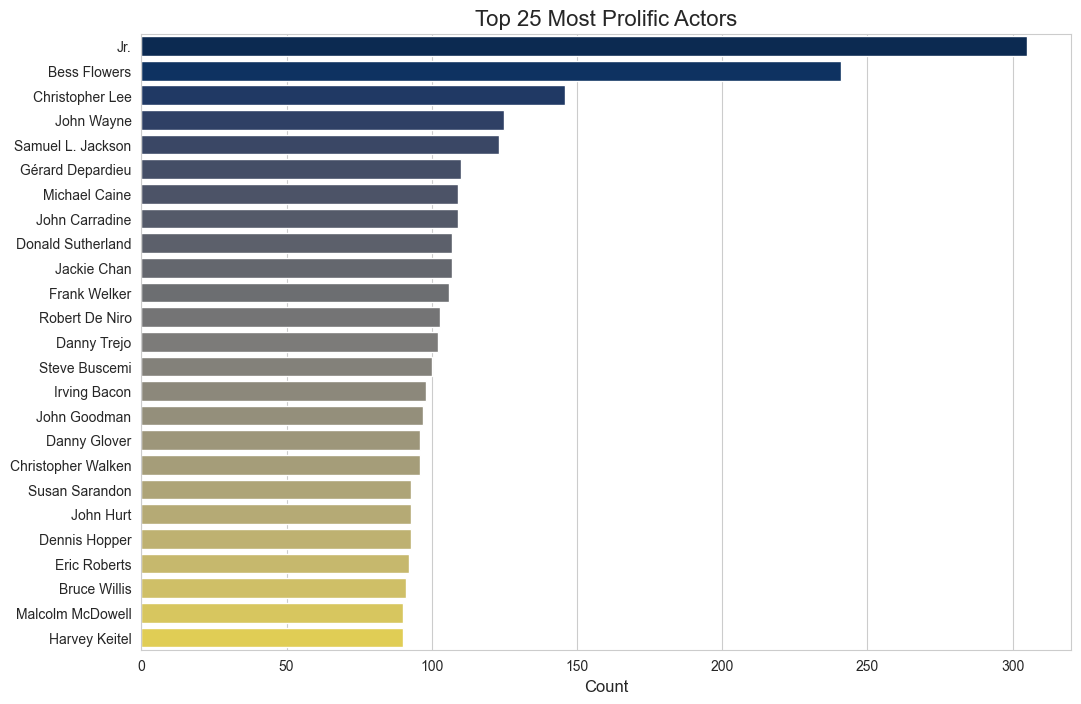

In [22]:
plot_top_n(df, 'name_cast', n=25, title='Top 25 Most Prolific Actors', color_palette='cividis')

C:\Users\A.R.I\AppData\Local\Temp\ipykernel_16212\1192687956.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts.values, y=top_counts.index, palette=color_palette)


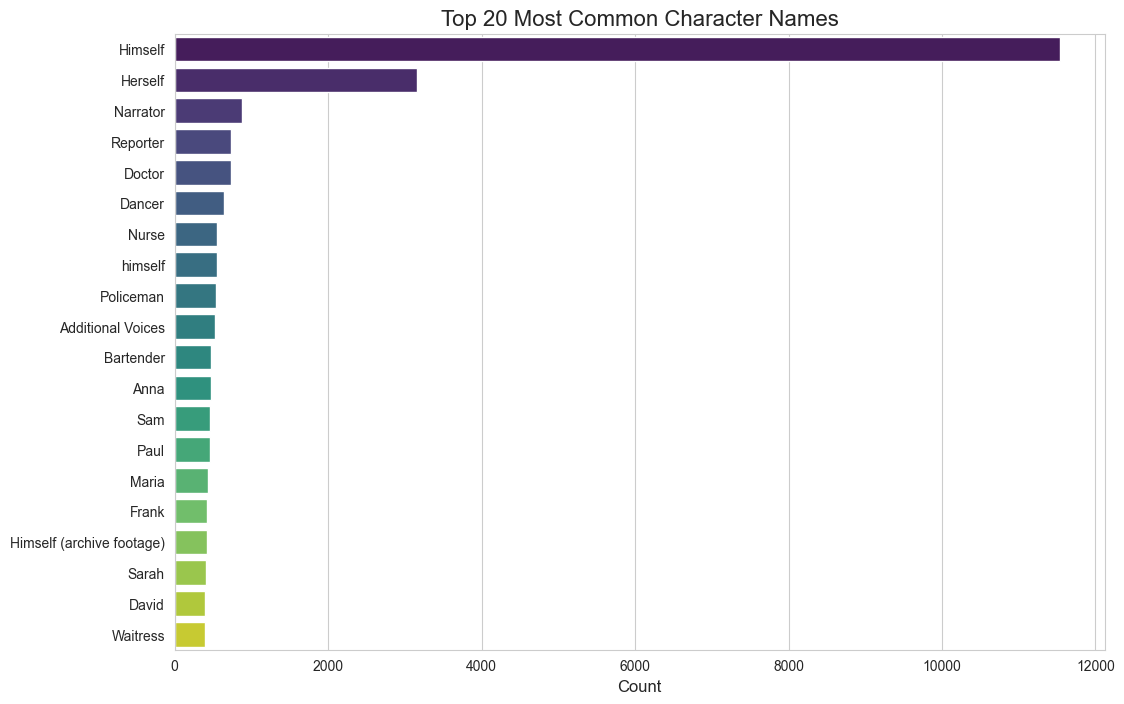

In [23]:
# Create a copy to safely modify for this specific plot
char_df = df.copy()
char_df['character_cast'] = char_df['character_cast'].str.replace(r'\(voice\)|\(uncredited\)', '', regex=True)

plot_top_n(char_df, 'character_cast', n=20, title='Top 20 Most Common Character Names')

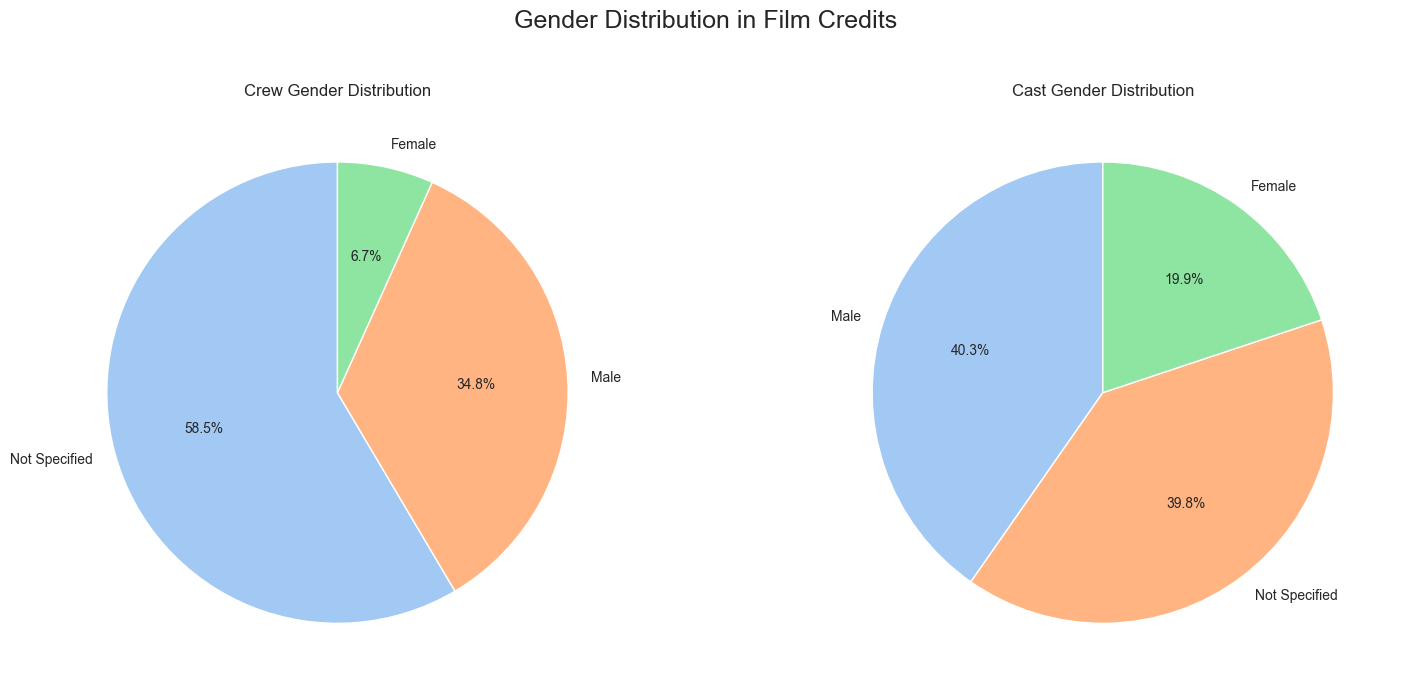

In [24]:
# Process and count genders for both crew and cast
crew_genders = df['gender_crew'].str.split(',').explode().str.strip().value_counts()
cast_genders = df['gender_cast'].str.split(',').explode().str.strip().value_counts()

# Define labels
gender_map = {'0': 'Not Specified', '1': 'Female', '2': 'Male'}
crew_genders.rename(index=gender_map, inplace=True)
cast_genders.rename(index=gender_map, inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Gender Distribution in Film Credits', fontsize=18)

# Crew Gender Plot
axes[0].pie(crew_genders, labels=crew_genders.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Crew Gender Distribution')

# Cast Gender Plot
axes[1].pie(cast_genders, labels=cast_genders.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Cast Gender Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [25]:
# Load the data and drop any rows with missing keywords
keywords_df = pd.read_csv('../Data/NewKeywords.csv').dropna(subset=['name_keywords'])

# The core of the analysis: split, explode into separate rows, and count
all_keywords = (
    keywords_df['name_keywords']
    .str.split(', ')
    .explode()
    .str.strip()
)

# Filter out any empty strings that may have resulted from the split
all_keywords = all_keywords[all_keywords != '']

# Get the frequency of each keyword
keyword_counts = all_keywords.value_counts()

print(f"Total Number of Unique Keywords: {len(keyword_counts)}")
print("\n--- Top 10 Most Common Keywords ---")
print(keyword_counts.head(10))

Total Number of Unique Keywords: 19954

--- Top 10 Most Common Keywords ---
name_keywords
woman director      3039
independent film    1914
murder              1285
based on novel       822
musical              726
sex                  679
violence             647
nudity               629
revenge              618
biography            613
Name: count, dtype: int64


C:\Users\A.R.I\AppData\Local\Temp\ipykernel_16212\755469077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='viridis')


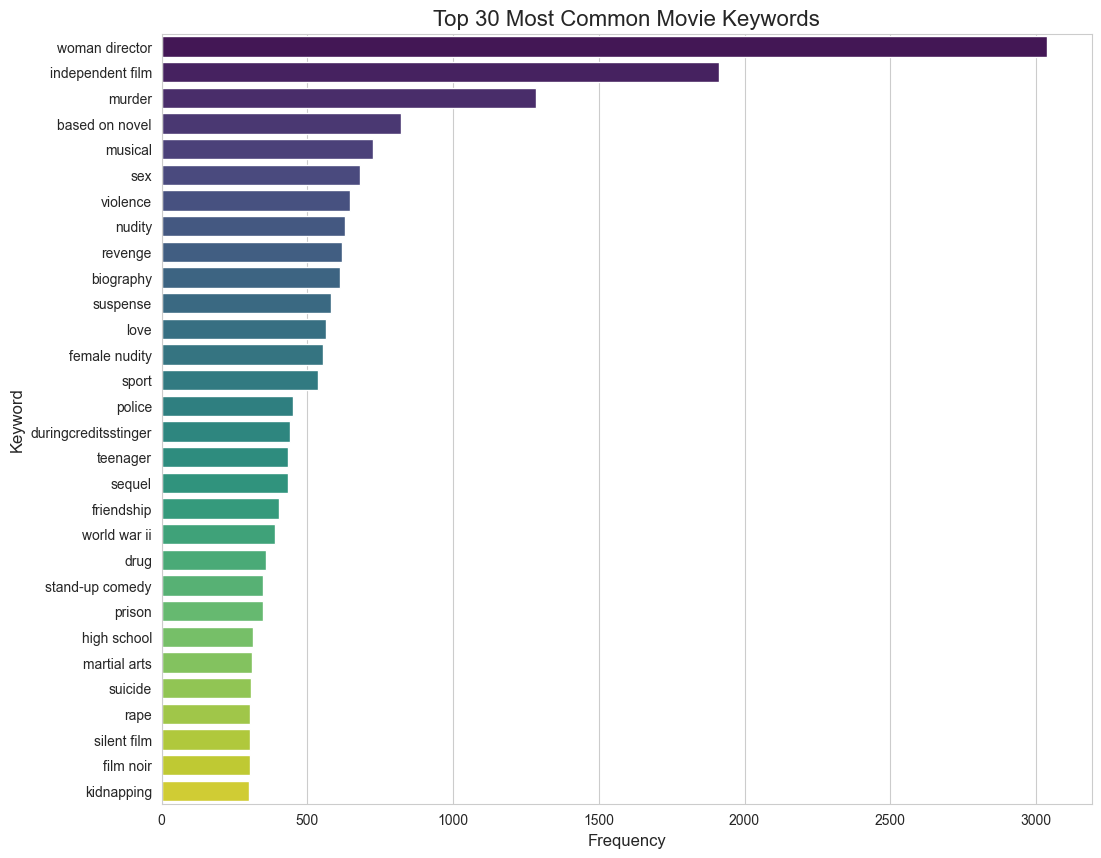

In [26]:
top_n = 30
top_keywords = keyword_counts.head(top_n)

plt.figure(figsize=(12, 10))
sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='viridis')
plt.title(f'Top {top_n} Most Common Movie Keywords', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.show()

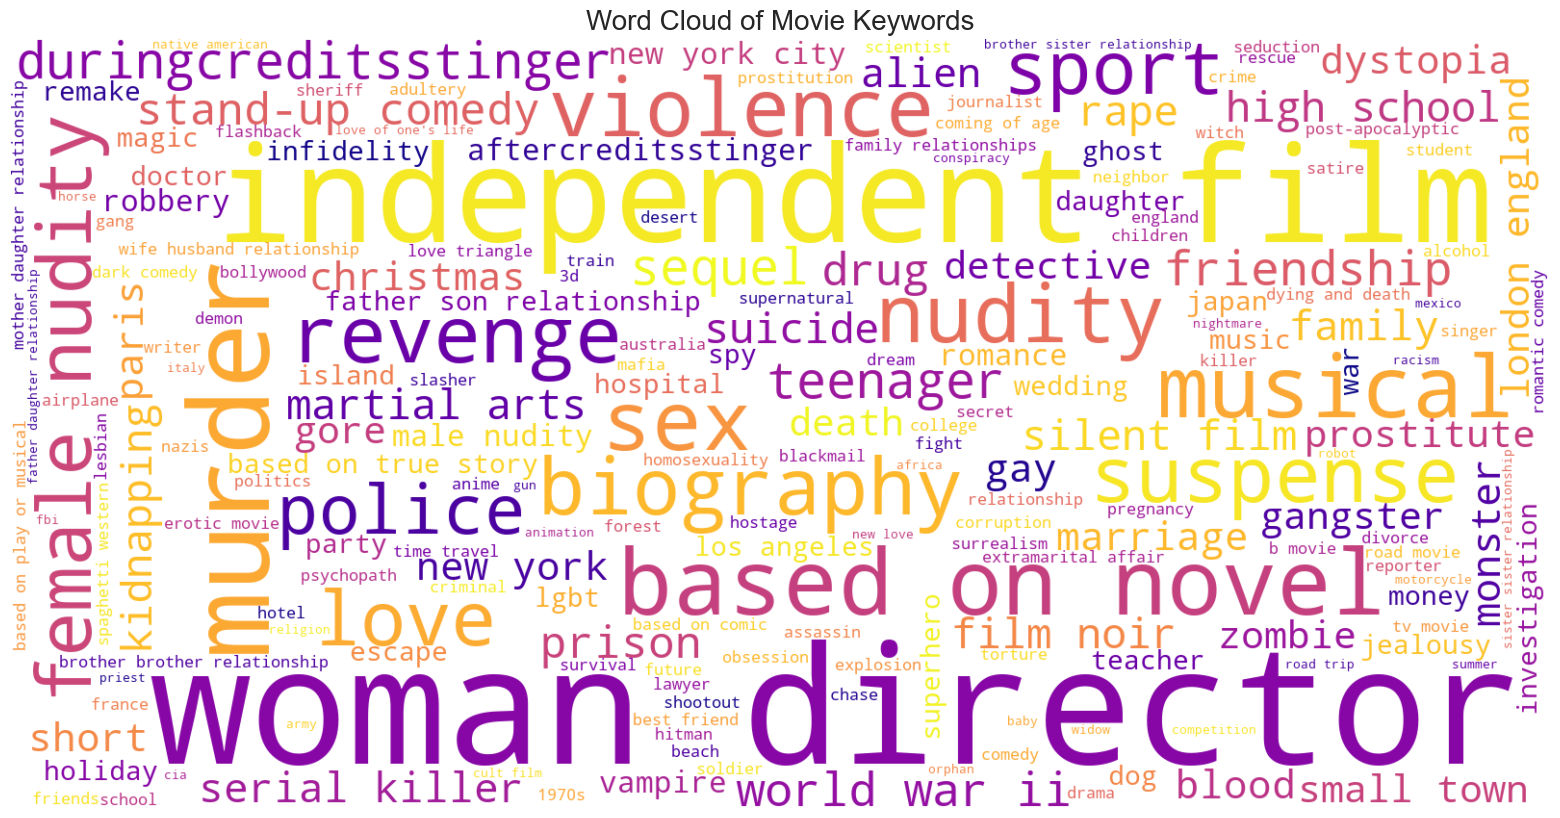

In [27]:
from wordcloud import WordCloud

# Create the word cloud object
wordcloud = WordCloud(width=1600, height=800, background_color='white', colormap='plasma').generate_from_frequencies(keyword_counts)

# Display the generated image
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hide the axes
plt.title('Word Cloud of Movie Keywords', fontsize=20)
plt.show()

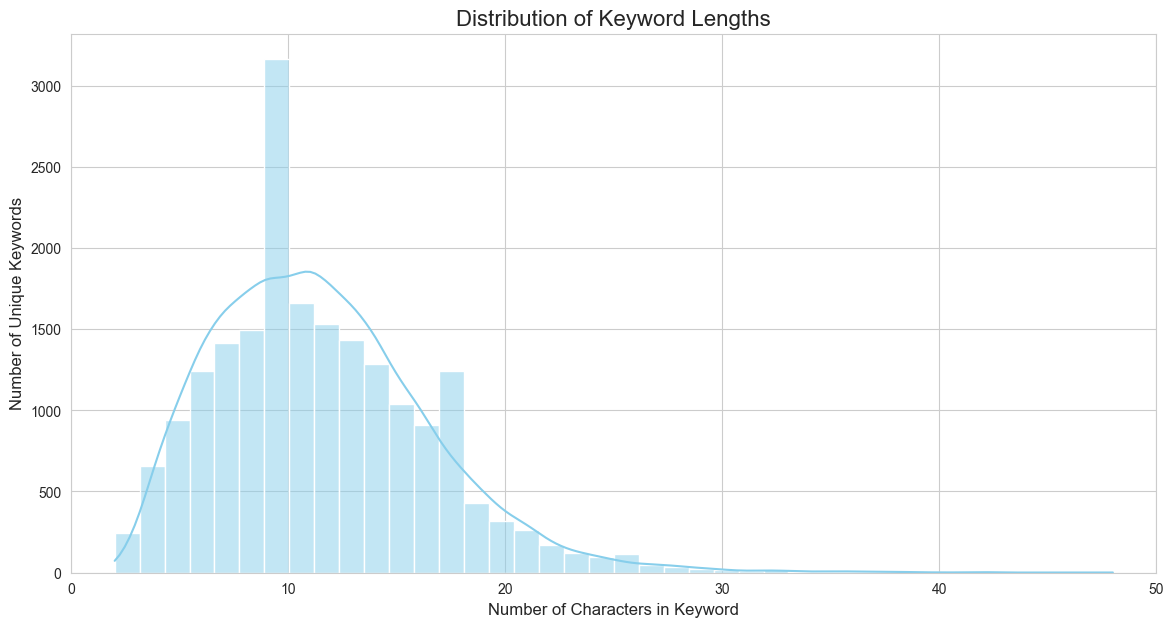

In [28]:
# Calculate the length of each unique keyword
keyword_lengths = keyword_counts.index.str.len()

plt.figure(figsize=(14, 7))
sns.histplot(keyword_lengths, bins=40, kde=True, color='skyblue')
plt.title('Distribution of Keyword Lengths', fontsize=16)
plt.xlabel('Number of Characters in Keyword', fontsize=12)
plt.ylabel('Number of Unique Keywords', fontsize=12)
plt.xlim(0, 50) # Limit x-axis for better readability
plt.show()

In [29]:
# Load the dataset
movies_df = pd.read_csv('../Data/NewMoviesMetadata.csv')

movies_df.drop(columns=['adult'], inplace=True)
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['budget'] = movies_df['budget'] * 1e-6

print("Dataset Information:")
movies_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45443 entries, 0 to 45442
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   budget                               45443 non-null  float64
 1   homepage                             45443 non-null  object 
 2   id                                   45443 non-null  int64  
 3   imdb_id                              45443 non-null  object 
 4   original_language                    45443 non-null  object 
 5   original_title                       45443 non-null  object 
 6   overview                             45443 non-null  object 
 7   popularity                           45443 non-null  float64
 8   poster_path                          45443 non-null  object 
 9   production_companies                 45443 non-null  object 
 10  release_date                         45443 non-null  object 
 11  revenue

In [30]:
for i in range(movies_df.shape[0]):
    if movies_df.loc[i, 'homepage'] == 'NANE':
        movies_df.loc[i, 'homepage'] = np.nan
movies_df.drop(columns=['homepage'], inplace=True)

In [31]:
for i in range(movies_df.shape[0]):
    if movies_df.loc[i, 'overview'] == 'NANE':
        movies_df.loc[i, 'overview'] = np.nan

In [32]:
movies_df['year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
movies_df['name_genres'] = movies_df['name_genres'].fillna('[]')
for i in range(movies_df.shape[0]):
    if movies_df.loc[i, 'tagline'] == 'NANE':
        movies_df.loc[i, 'tagline'] = ''

In [33]:
movies_df.to_csv('../data/NewMoviesMetadata.csv', index=False)

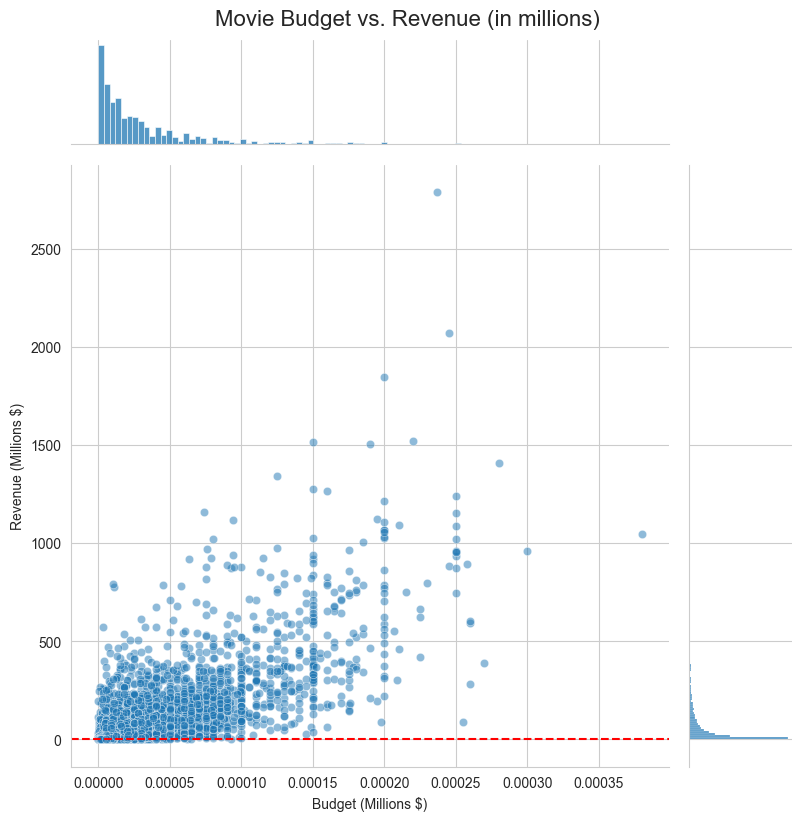

In [34]:
# Filter for movies with known budget and revenue
financial_df = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)].copy()

# Convert to millions for easier readability
financial_df['budget_millions'] = financial_df['budget'] / 1e6
financial_df['revenue_millions'] = financial_df['revenue'] / 1e6

# Create a jointplot to see the relationship and distributions
g = sns.jointplot(
    data=financial_df, x='budget_millions', y='revenue_millions',
    kind='scatter', height=8, joint_kws={'alpha': 0.5}
)
g.fig.suptitle('Movie Budget vs. Revenue (in millions)', y=1.02, fontsize=16)
g.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')
g.set_axis_labels('Budget (Millions $)', 'Revenue (Millions $)')
plt.show()

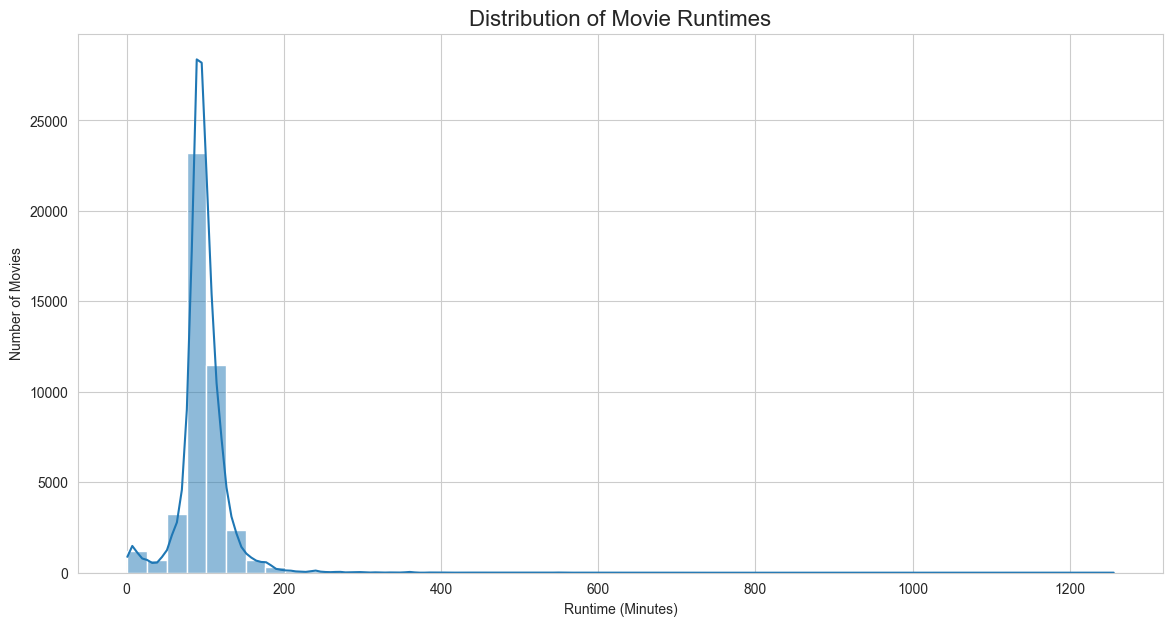

In [36]:
# Convert runtime to numeric, forcing errors to NaN, then filter
movies_df['runtime'] = pd.to_numeric(movies_df['runtime'], errors='coerce')

# Filter out NaN and zero runtimes
valid_runtimes = movies_df[movies_df['runtime'] > 0]['runtime']

# Plot the distribution
plt.figure(figsize=(14, 7))
sns.histplot(valid_runtimes, bins=50, kde=True)
plt.title('Distribution of Movie Runtimes', fontsize=16)
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Number of Movies')
plt.show()


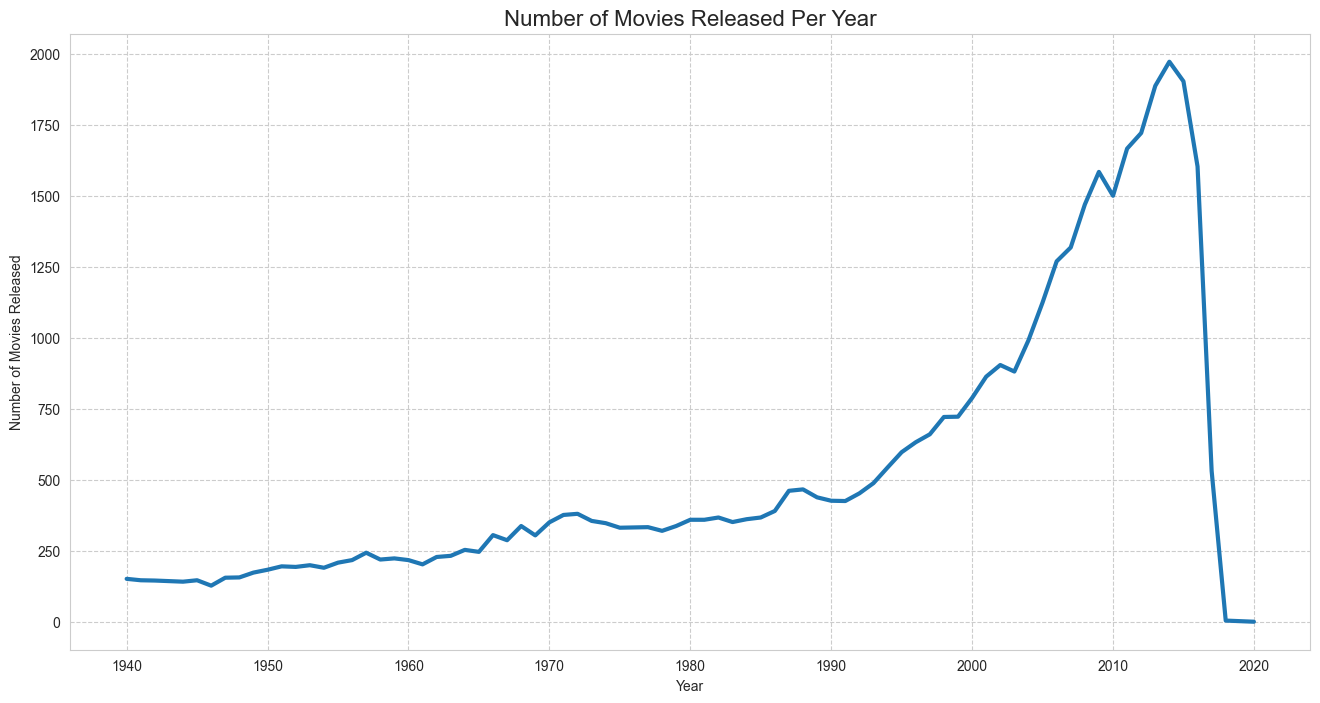

In [38]:
# Convert release_date to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Extract the release year
movies_df['release_year'] = movies_df['release_date'].dt.year

# Count movies per year
yearly_counts = movies_df['release_year'].value_counts().sort_index()

# Filter for modern years
yearly_counts = yearly_counts.loc[1940:2020]

# Plot
plt.figure(figsize=(16, 8))
yearly_counts.plot(kind='line', lw=3)
plt.title('Number of Movies Released Per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.grid(True, which='both', linestyle='--')
plt.show()


C:\Users\A.R.I\AppData\Local\Temp\ipykernel_16212\3547846211.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


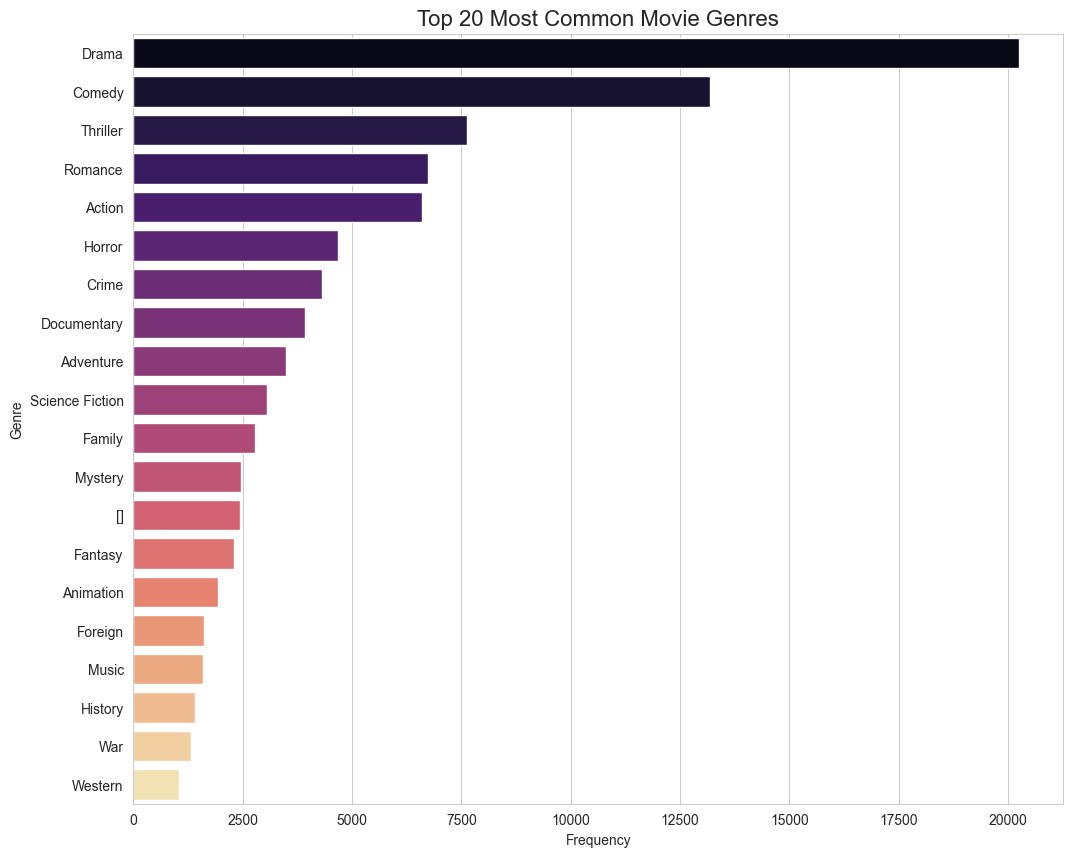

In [45]:
top_genres = movies_df['name_genres'].astype(str).str.split(', ').explode().value_counts().head(20)

plt.figure(figsize=(12, 10))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('Top 20 Most Common Movie Genres', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

C:\Users\A.R.I\AppData\Local\Temp\ipykernel_16212\3917991171.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=top_companies.values, y=top_companies.index, palette='viridis')
C:\Users\A.R.I\AppData\Local\Temp\ipykernel_16212\3917991171.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=top_countries.values, y=top_countries.index, palette='plasma')


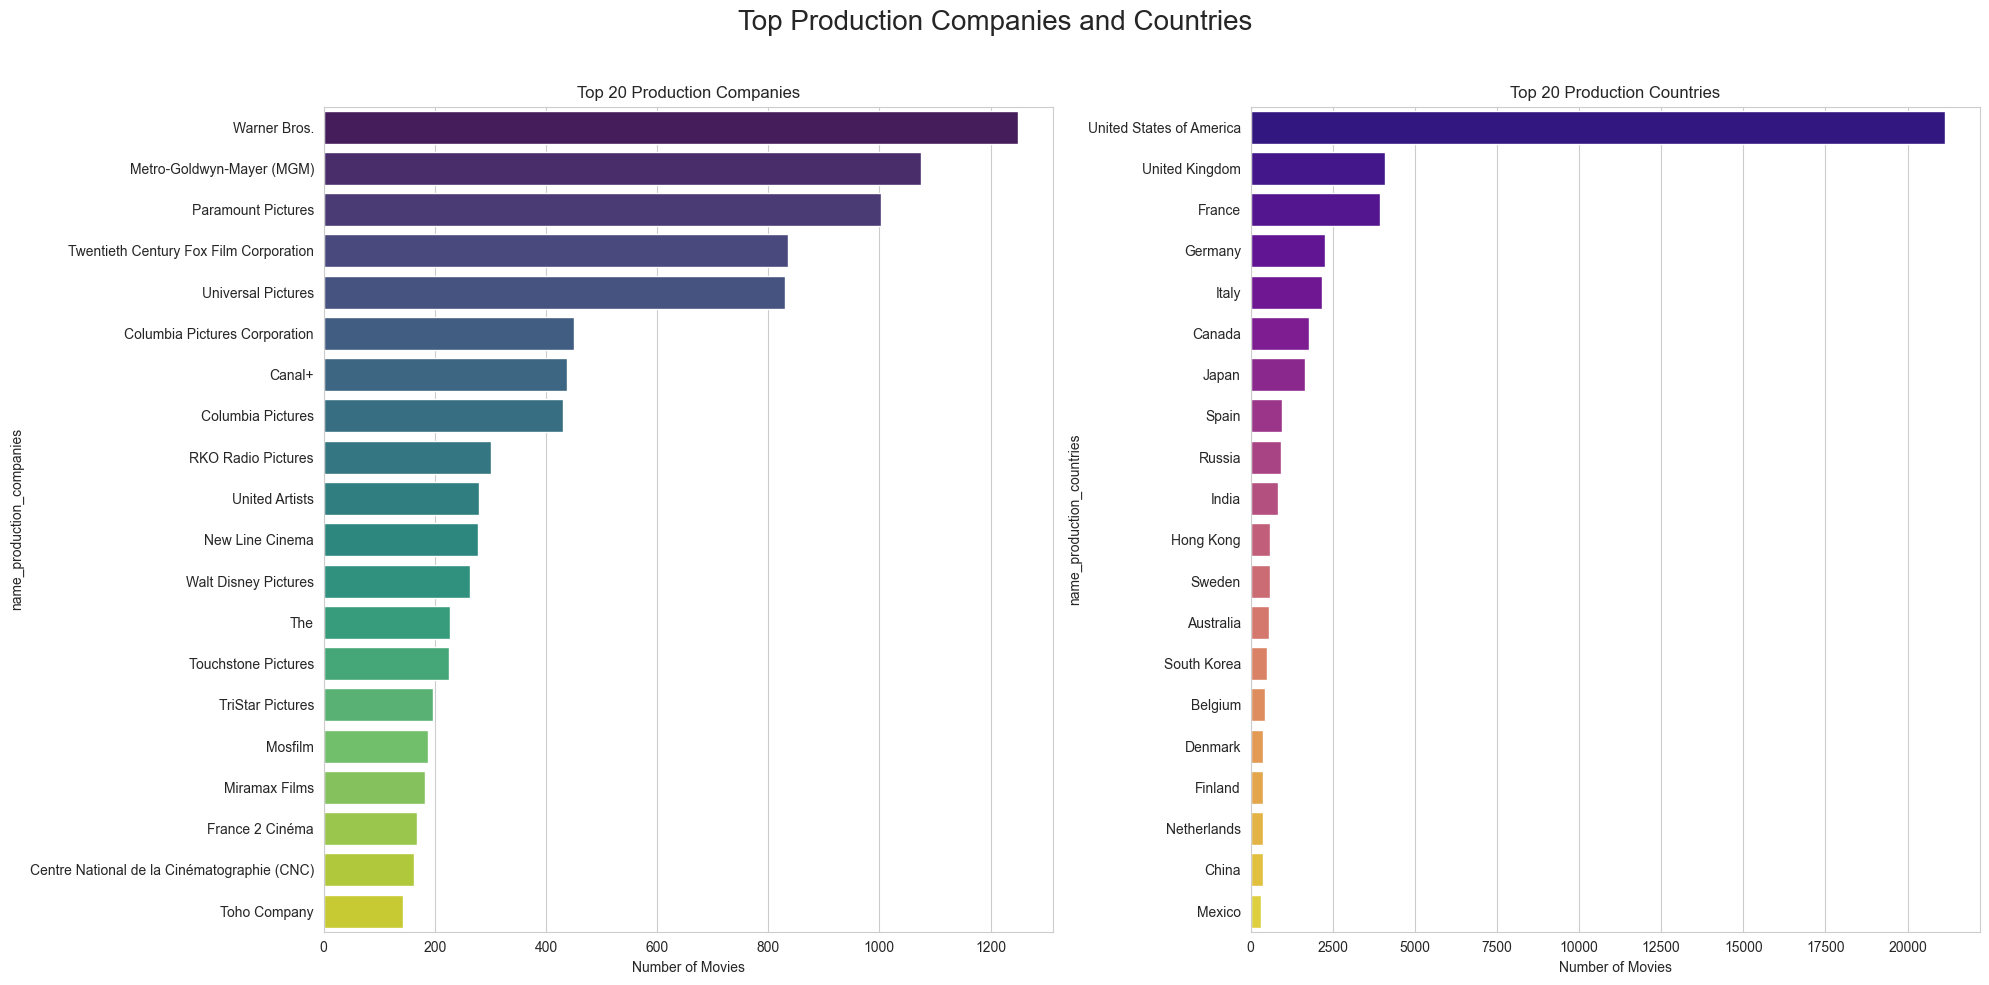

In [49]:
# Drop NaN before splitting/exploding
top_companies = (
    movies_df['name_production_companies']
    .dropna()
    .astype(str)
    .str.split(', ')
    .explode()
    .value_counts()
    .head(20)
)

top_countries = (
    movies_df['name_production_countries']
    .dropna()
    .astype(str)
    .str.split(', ')
    .explode()
    .value_counts()
    .head(20)
)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Top Production Companies and Countries', fontsize=20)

# Plot for companies
sns.barplot(ax=axes[0], x=top_companies.values, y=top_companies.index, palette='viridis')
axes[0].set_title('Top 20 Production Companies')
axes[0].set_xlabel('Number of Movies')

# Plot for countries
sns.barplot(ax=axes[1], x=top_countries.values, y=top_countries.index, palette='plasma')
axes[1].set_title('Top 20 Production Countries')
axes[1].set_xlabel('Number of Movies')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()